## Libraries

In [57]:
#importing initial packages
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import pickle

## Importing Dataframe

In [58]:
df = pd.read_csv('kc_house_data_train.csv', index_col=0)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Initial EDA

In [59]:
#checking the datatypes
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [60]:
#checking for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [61]:
#removing id column as its useless
#df.drop('id',axis=1,inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [62]:
df.shape

(17290, 21)

In [63]:
df['bedrooms'].value_counts()
#df['bathrooms'].value_counts()

3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [64]:
#I think 33 is also a mistake so I will be replacing it with the mean of the data
df.loc[df.bedrooms == 33, 'bedrooms'] = 3
df['bedrooms'] = np.where((df['bedrooms'] < 4) & (df['bedrooms'] > 3) , 3,df['bedrooms'])

In [65]:
#df.bedrooms  == 3.37247

In [66]:
df.bedrooms.value_counts()

3     7865
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
Name: bedrooms, dtype: int64

## Data visualizations and relationships

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94efdd12e8>,
      dtype=object)

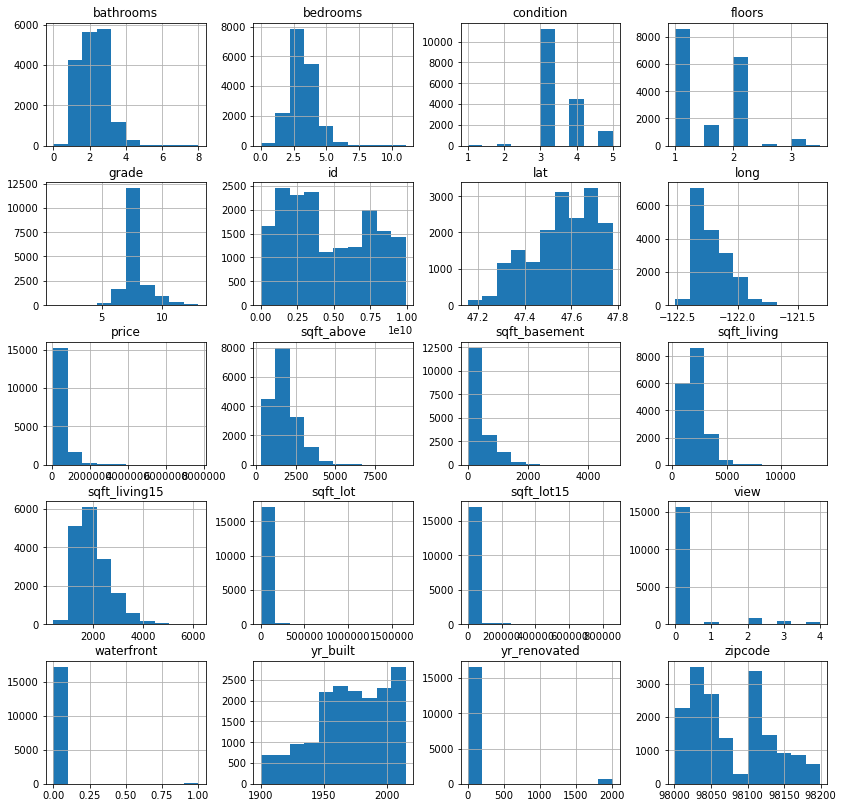

In [67]:
df.hist(figsize=(14,14))

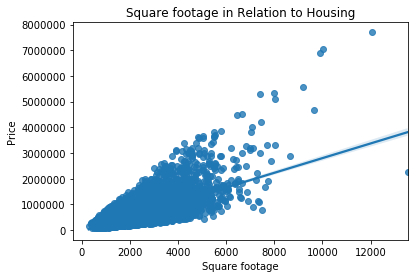

In [68]:
# One of the biggest selling points of any house is how big it is so I wanted to see the relationship with 
#pure square footage and price
sns.regplot(data=df,x='sqft_living',y='price');
plt.title("Square footage in Relation to Housing");
plt.xlabel("Square footage");
plt.ylabel("Price");

In [69]:
#After seeing the strong relationship with square footage and price I decided to test my theory with a corrilation
#test, and it does in fact have a strong relationship
corr = stats.pearsonr(df.sqft_living, df.price)
corr

(0.7035403039789669, 0.0)

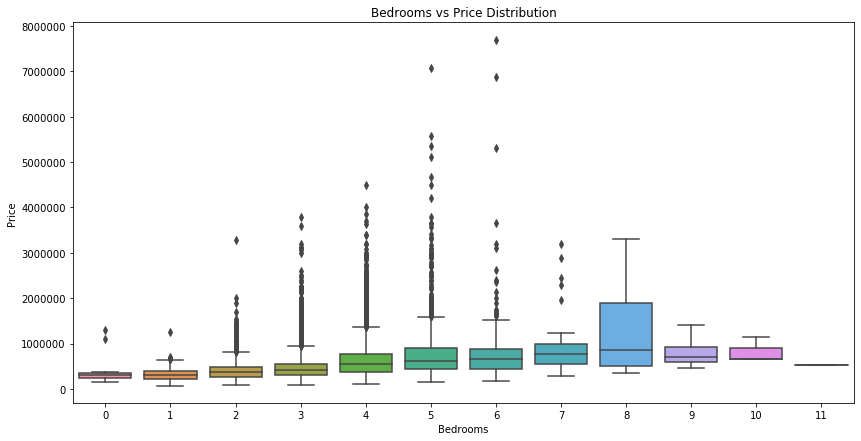

In [70]:
#Another Selling point that I think of when buying a house is the number of bedrooms
fig, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(x='bedrooms', y="price", data=df)
ax.set(xlabel='Bedrooms', ylabel='Price',title='Bedrooms vs Price Distribution');

## Feature Enginering and  Selection

In [71]:
#manipulating date column to add year, month, and day columns
df['date'] = df['date'].str.slice(0,8,1)
df['year_sold'] = df['date'].str.slice(0,4,1)
df['month_sold'] = df['date'].str.slice(4,6,1)
df['day_sold'] = df['date'].str.slice(6,8,1)

In [72]:
#changing the datatype of the date columns into integers
df['year_sold'] = df['year_sold'].astype('int64')
df['month_sold'] = df['month_sold'].astype('int64')
df['day_sold'] = df['day_sold'].astype('int64')

In [73]:
#Creating Dummie variables for zipcodes
zip_dummies = pd.get_dummies(df['zipcode'],prefix='zip',drop_first=True)


In [74]:
df.head()
zip_dummies.head()

,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
#dropping initial zipcode column
no_zip_df = df.drop(['zipcode'], axis=1)

In [76]:
#Combining the original df with the dummies df
ols_1 = pd.concat([no_zip_df, zip_dummies], axis=1)


In [77]:
ols_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,2591820310,20141006,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,2014,10,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7974200820,20140821,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,2014,8,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7701450110,20140815,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,2014,8,15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9522300010,20150331,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,2015,3,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9510861140,20140714,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,2014,7,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
ols_1.shape

(17290, 92)

In [79]:
#Dropping the date function since I have the other columns now
ols_1= ols_1.drop(columns='date')

In [80]:
#select target variable 
outcome = 'price'
#seperate target from the predictors
predictors = ols_1.drop('price',axis=1)
#place a + between each predictor column name
pred_sum = '+'.join(predictors.columns)
#place a ~ between the target and the predictor sum and save as variable formula
formula = outcome + '~' + pred_sum

In [81]:
#ols model using the new dataframe
model_1 = ols(formula=formula, data=ols_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     805.7
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:03:21   Log-Likelihood:            -2.3217e+05
No. Observations:               17290   AIC:                         4.645e+05
Df Residuals:                   17200   BIC:                         4.652e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.003e+08   1.11e+07     -8.998      0.000   -1.22e+08   -7.84e+07
id            -6.713e-07   4.55e-07     -1.477      0.140   -1.56e-06     2.2e-07
bedrooms      -3.066e+04   1811.725    -16.925      0.000   -3.42e+04   -2.71e+04
bathrooms      2.505e+04   3006.606      8.331      0.000    1.92e+04    3.09e+04
sqft_living     117.1794      2.100     55.790      0.000     113.063     121.296
sqft_lot          0.2107      0.042      4.999      0.000       0.128       0.293
floors        -4.592e+04   3610.941    -12.717      0.000    -5.3e+04   -3.88e+04
waterfront      6.67e+05   1.58e+04     42.309      0.000    6.36e+05    6.98e+05
view           5.457e+04   1991.642     27.397      0.000    5.07e+04    5.85e+04
condition      2.709e+04   2203.079     12.296      0.000    2.28e+04    3.14e+04
grade          5.618e+04   2082.627     26.976      0.000    5.21e+04    6.03e+04
sqft_above       99.0527      2.170     45.652      0.000      94.800     103.306
sqft_basement    18.1219      2.482      7.301      0.000      13.256      22.987
yr_built       -730.7946     74.412     -9.821      0.000    -876.649    -584.940
yr_renovated     17.7874      3.383      5.259      0.000      11.157      24.418
lat             2.22e+05   7.23e+04      3.070      0.002    8.03e+04    3.64e+05
long           -1.45e+05   5.15e+04     -2.814      0.005   -2.46e+05    -4.4e+04
sqft_living15     9.9767      3.309      3.015      0.003       3.491      16.463
sqft_lot15       -0.0764      0.068     -1.120      0.263      -0.210       0.057
year_sold      3.623e+04   4337.462      8.352      0.000    2.77e+04    4.47e+04
month_sold     1410.4876    650.218      2.169      0.030     135.994    2684.981
day_sold       -253.6462    146.855     -1.727      0.084    -541.497      34.205
zip_98002      3.481e+04   1.67e+04      2.085      0.037    2090.652    6.75e+04
zip_98003     -2.572e+04   1.49e+04     -1.730      0.084   -5.48e+04    3416.591
zip_98004      7.336e+05    2.7e+04     27.204      0.000    6.81e+05    7.86e+05
zip_98005      2.374e+05   2.85e+04      8.323      0.000    1.81e+05    2.93e+05
zip_98006      2.239e+05   2.35e+04      9.530      0.000    1.78e+05     2.7e+05
zip_98007      1.986e+05   2.93e+04      6.776      0.000    1.41e+05    2.56e+05
zip_98008      1.998e+05    2.8e+04      7.126      0.000    1.45e+05    2.55e+05
zip_98010      9.549e+04   2.57e+04      3.718      0.000    4.51e+04    1.46e+05
zip_98011      3.454e+04   3.65e+04      0.947      0.344    -3.7e+04    1.06e+05
zip_98014      8.286e+04   4.01e+04      2.067      0.039    4298.589    1.61e+05
zip_98019      3.112e+04   3.95e+04      0.787      0.431   -4.63e+04    1.09e+05
zip_98022      4.434e+04   2.19e+04      2.028      0.043    1494.667    8.72e+04
zip_98023     -4.897e+04   1.36e+04     -3.598   

In [82]:
#Train test split train data
y = ols_1[['price']]
x = ols_1.drop(['price'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)



linreg = LinearRegression()
ridge = Ridge()
lasso = Lasso()

ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)
linreg.fit(x_train, y_train)
#predict on test data
y_hat_train_1_r = ridge.predict(x_train)
y_hat_test_1_r = ridge.predict(x_test)
y_hat_train_1_l = lasso.predict(x_train)
y_hat_test_1_l = lasso.predict(x_test)
y_hat_train_1 = linreg.predict(x_train)
y_hat_test_1 = linreg.predict(x_test)
# calculate RMSE
train_mse_1 = (mean_squared_error(y_train, y_hat_train_1))**.5
test_mse_1 = (mean_squared_error(y_test, y_hat_test_1))**.5
train_mse_1_r  = (mean_squared_error(y_train, y_hat_train_1_r))**.5
test_mse_1_r = (mean_squared_error(y_test, y_hat_test_1_r))**.5
train_mse_1_l  = (mean_squared_error(y_train, y_hat_train_1_l))**.5
test_mse_1_l = (mean_squared_error(y_test, y_hat_test_1_l))**.5
print('train_mse_1',train_mse_1,'test_mse_1',test_mse_1)
print('train_mse_1_r',train_mse_1_r,'test_mse_1_r',test_mse_1_r)
print('train_mse_1_l',train_mse_1_l,'test_mse_1_l',test_mse_1_l)

/Users/kelvinarellano/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.68609e-24): result may not be accurate.
  overwrite_a=True).T


train_mse_1 165969.7646483113 test_mse_1 157446.44096860918
train_mse_1_r 166062.29813099117 test_mse_1_r 157641.89499214938
train_mse_1_l 165972.39146042964 test_mse_1_l 157453.23785281988


/Users/kelvinarellano/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190670759299495.12, tolerance: 194915836407.08917
  positive)


In [83]:
#My rmse looks good, but with the test rmse lower then the train rmse, it tells me that my model
# is probably underfitted

In [84]:
#Generating polynomials for more interactions
df_features = ols_1.drop(['price'], axis = 1)
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  2.591820e+09       4.0       2.25       2070.0    8893.0     2.0   
1  7.974201e+09       5.0       3.00       2900.0    6730.0     1.0   
2  7.701450e+09       4.0       2.50       3770.0   10893.0     2.0   
3  9.522300e+09       3.0       3.50       4560.0   14608.0     2.0   
4  9.510861e+09       3.0       2.50       2550.0    5376.0     2.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0         0.0   0.0        4.0    8.0      2070.0            0.0    1986.0   
1         0.0   0.0        5.0    8.0      1830.0         1070.0    1977.0   
2         0.0   2.0        3.0   11.0      3770.0            0.0    1997.0   
3         0.0   2.0        3.0   12.0      4560.0            0.0    1990.0   
4         0.0   0.0        3.0    9.0      2550.0            0.0    2004.0   

   yr_renovated      lat     long  sqft_living15  sqft_lot15  year_sold  \
0           0.0  47.4388 -122.162         2390.0      7700.0     2014.0   
1           0.0  47.6784 -122.285         2370.0      6283.0     2014.0   
2           0.0  47.5646 -122.129         3710.0      9685.0     2014.0   
3           0.0  47.6995 -122.228         4050.0     14226.0     2015.0   
4           0.0  47.6647 -122.083         2250.0      4050.0     2014.0   

   month_sold  day_sold  zip_98002  zip_98003  zip_98004  zip_98005  \
0        10.0       6.0        0.0        0.0        0.0        0.0   
1         8.0      21.0        0.0        0.0        0.0        0.0   
2         8.0      15.0        0.0        0.0        0.0        0.0   
3         3.0      31.0        0.0        0.0        0.0        0.0   
4         7.0      14.0        0.0        0.0        0.0        0.0   

   zip_98006  zip_98007  zip_98008  zip_98010  zip_98011  zip_98014  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        1.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   zip_98019  zip_98022  zip_98023  zip_98024  zip_98027  zip_98028  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   zip_98029  zip_98030  zip_98031  zip_98032  zip_98033  zip_98034  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        1.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   zip_98038  zip_98039  zip_98040  zip_98042  zip_98045  zip_98052  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        1.0   

   zip_98053  zip_98055  zip_98056  zip_98058  zip_98059  zip_98065  \
0        0.0        0.0        0.0        1.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   zip_98070  zip_98072  zip_98074  zip_98075  zip_98077  zip_98092  \
0        0.0        0.0        0.

In [85]:
target= ols_1[['price']]

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(df_poly2, target, random_state=42,test_size=0.2)


In [87]:
scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly2.columns)

#transform the testing data
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_poly2.columns)

In [88]:
X_train.shape

(13832, 4185)

In [ ]:
ridge.fit(X_train,Y_train)
lasso.fit(X_train,Y_train)
linreg.fit(X_train, Y_train)
#predict on test data
y_hat_train_1_r = ridge.predict(X_train)
y_hat_test_1_r = ridge.predict(X_test)
y_hat_train_1_l = lasso.predict(X_train)
y_hat_test_1_l = lasso.predict(X_test)
y_hat_train_1 = linreg.predict(X_train)
y_hat_test_1 = linreg.predict(X_test)
# calculate RMSE
train_mse_1 = (mean_squared_error(Y_train, y_hat_train_1))**.5
test_mse_1 = (mean_squared_error(Y_test, y_hat_test_1))**.5
train_mse_1_r  = (mean_squared_error(Y_train, y_hat_train_1_r))**.5
test_mse_1_r = (mean_squared_error(Y_test, y_hat_test_1_r))**.5
train_mse_1_l  = (mean_squared_error(Y_train, y_hat_train_1_l))**.5
test_mse_1_l = (mean_squared_error(Y_test, y_hat_test_1_l))**.5
print('train_mse_1',train_mse_1,'test_mse_1',test_mse_1)
print('train_mse_1_r',train_mse_1_r,'test_mse_1_r',test_mse_1_r)
print('train_mse_1_l',train_mse_1_l,'test_mse_1_l',test_mse_1_l)

/Users/kelvinarellano/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70035032902836.74, tolerance: 194915836407.08917
  positive)


In [32]:
#Doing an f test for 115 columns to eliminate columns that don't have a high impact on the model
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn import metrics


selector = SelectKBest(f_regression, k=115)

selector.fit(X_train, y_train)


/Users/kelvinarellano/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kelvinarellano/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=115, score_func=<function f_regression at 0x7fe70fcb27b8>)

In [33]:
selector.get_support()

array([False,  True,  True, ..., False, False, False])

In [34]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [35]:
list(removed_columns)


['id',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'yr_built',
 'yr_renovated',
 'long',
 'sqft_lot15',
 'year_sold',
 'month_sold',
 'day_sold',
 'zip_98002',
 'zip_98003',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98022',
 'zip_98023',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98030',
 'zip_98031',
 'zip_98032',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98042',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98070',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98092',
 'zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_98119',
 'zip_98122',
 'zip_98125',
 'zip_98126',
 'zip_98133',
 'zip_98136',
 'zip_98144',
 'zip_98146',
 'zi

In [36]:
print(list(selected_columns))


['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15', 'id sqft_living', 'id view', 'id sqft_above', 'bedrooms^2', 'bedrooms bathrooms', 'bedrooms sqft_living', 'bedrooms floors', 'bedrooms waterfront', 'bedrooms view', 'bedrooms grade', 'bedrooms sqft_above', 'bedrooms sqft_basement', 'bedrooms yr_built', 'bedrooms lat', 'bedrooms long', 'bedrooms sqft_living15', 'bedrooms year_sold', 'bathrooms^2', 'bathrooms sqft_living', 'bathrooms floors', 'bathrooms waterfront', 'bathrooms view', 'bathrooms condition', 'bathrooms grade', 'bathrooms sqft_above', 'bathrooms sqft_basement', 'bathrooms yr_built', 'bathrooms lat', 'bathrooms long', 'bathrooms sqft_living15', 'bathrooms year_sold', 'bathrooms month_sold', 'bathrooms zip_98004', 'sqft_living^2', 'sqft_living floors', 'sqft_living waterfront', 'sqft_living view', 'sqft_living condition', 'sqft_living grade', 'sqft_living sqft_above', 'sqft_living sqft_basement', 'sqft_living yr_bu

In [37]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


Training Root Mean Squared Error: 157926.13910661786
Testing Root Mean Squared Error: 155714.79997127902


In [38]:
#After creating polynomials and selecting the 115 best features by running an f test we have lowered my rmse
#and my model no longer shows signs of over fitting

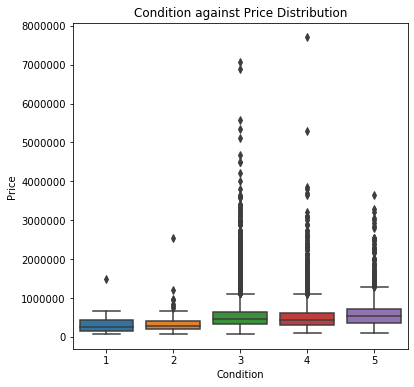

In [39]:
#individual feature engineering
# Boxplots comparing the condition of the house vs price

fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(x='condition', y="price", data=df)
ax.set(xlabel='Condition', ylabel='Price',title='Condition against Price Distribution');

In [40]:
alpha = 0.05 
#ANOVA Test Setup
formula = 'price~C(condition)'
lm_condition = ols(formula, df).fit()
anova_condition = sm.stats.anova_lm(lm_condition, typ=2)

if anova_condition["PR(>F)"][0] < alpha:
    print("The property condition have a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])

The property condition have a statistically significant impact on average property value
Conditions F-statisic Probability:  6.813536869395142e-24


In [41]:
#Condition does have a statistically significant impact on price, but it looks like the price dips when going from 
# 3 to 4 aswell as 1 to 2. I think this is because people don't know what to do with middling scores


In [42]:
df['basement'] = df["sqft_basement"] > 0
#df['basement_mean'] = df['basement'].price.mean()
df['no_basement'] = df["sqft_basement"] == 0
#df['no_basement_mean'] = df['no_basement'].price.mean()

#mean values to plot
df['renovated'] = df["yr_renovated"] > 0
#df['renovated_mean'] = renovated.price.mean()
df['not_renovated'] = df["yr_renovated"] == 0
#df['not_renovated_mean'] = not_renovated.price.mean()
df['basement'].value_counts()

False    10484
True      6806
Name: basement, dtype: int64

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Basement'),
 Text(0.5, 1.0, 'Basement effect on Price')]

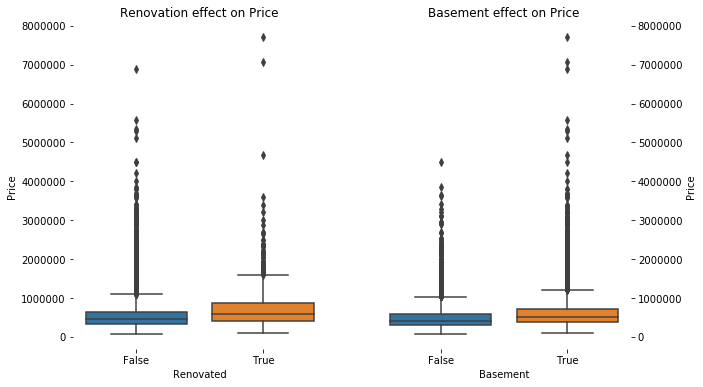

In [43]:
# Boxplots comparing 
#(1) Houses with renovation to Houses without renovation
## Waterfront houses seem to be significantly more expensive 
#(2) Houses with basement to Houses without basements 
## Basement also seems to be significantly more expensive

f, axes = plt.subplots(1, 2, figsize=(10,6))
sns.boxplot(x=df.renovated,y=df['price'], ax=axes[0])
sns.boxplot(x=df.basement,y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Renovated', ylabel='Price', title = "Renovation effect on Price")
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Basement', ylabel='Price', title = "Basement effect on Price")


In [44]:
#making one finalfeature for the age of renovation
df["renovation_age"] = df.yr_renovated.apply(lambda x: 2020-x if x > 0 else 0)

In [45]:
no_zip_df_2 = df.drop(['zipcode'], axis=1)

In [46]:
zip_dummies_2 = pd.get_dummies(df['zipcode'],prefix='zip',drop_first=True)

In [47]:
#dropping accidentally generated rows
zip_dummies_2 = zip_dummies_2.iloc[1:]

In [48]:
no_zip_df_2 = no_zip_df_2.iloc[1:]

In [49]:
#dropping initial date column now that they have sepparate columns
no_zip_df_2= no_zip_df_2.drop(columns='date')

In [50]:
#dropping zipcodes from first dataframce for concatination with dummies
no_zip_df_2 = no_zip_df_2.drop(columns='id')

In [51]:
ols_2 = pd.concat([no_zip_df_2, zip_dummies_2], axis=1)

In [52]:
#select target variable 
outcome_2 = 'price'
#seperate target from the predictors
predictors_2 = ols_2.drop('price',axis=1)
#place a + between each predictor column name
pred_sum_2 = '+'.join(predictors_2.columns)
#place a ~ between the target and the predictor sum and save as variable formula
formula_2 = outcome_2 + '~' + pred_sum_2

In [53]:
#ols model using the new dataframe
model_2 = ols(formula=formula_2, data=ols_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     801.4
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:02:06   Log-Likelihood:            -2.3211e+05
No. Observations:               17289   AIC:                         4.644e+05
Df Residuals:                   17198   BIC:                         4.651e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -4.063e+07   4.45e+06     -9.136      0.000   -4.94e+07   -3.19e+07
basement[T.True]      -2.033e+07   2.22e+06     -9.142      0.000   -2.47e+07    -1.6e+07
no_basement[T.True]    -2.03e+07   2.22e+06     -9.130      0.000   -2.47e+07   -1.59e+07
renovated[T.True]       -21.2062      2.187     -9.698      0.000     -25.492     -16.920
not_renovated[T.True] -4.063e+07   4.45e+06     -9.136      0.000   -4.94e+07   -3.19e+07
bedrooms              -3.086e+04   1807.588    -17.072      0.000   -3.44e+04   -2.73e+04
bathrooms              2.633e+04   3023.934      8.706      0.000    2.04e+04    3.23e+04
sqft_living             123.6817      2.350     52.625      0.000     119.075     128.288
sqft_lot                  0.2187      0.042      5.207      0.000       0.136       0.301
floors                -4.651e+04   3612.116    -12.875      0.000   -5.36e+04   -3.94e+04
waterfront             6.711e+05   1.57e+04     42.630      0.000     6.4e+05    7.02e+05
view                   5.421e+04   1988.111     27.267      0.000    5.03e+04    5.81e+04
condition              2.768e+04   2203.266     12.564      0.000    2.34e+04     3.2e+04
grade                  5.642e+04   2082.830     27.090      0.000    5.23e+04    6.05e+04
sqft_above               88.6976      2.822     31.425      0.000      83.165      94.230
sqft_basement            34.7841      3.795      9.167      0.000      27.346      42.222
yr_built               -725.2863     74.260     -9.767      0.000    -870.844    -579.729
yr_renovated          -2.007e+04   2201.674     -9.114      0.000   -2.44e+04   -1.57e+04
lat                    2.239e+05   7.21e+04      3.104      0.002    8.25e+04    3.65e+05
long                  -1.457e+05   5.14e+04     -2.836      0.005   -2.46e+05    -4.5e+04
sqft_living15            11.0078      3.303      3.333      0.001       4.533      17.482
sqft_lot15               -0.0697      0.068     -1.027      0.304      -0.203       0.063
year_sold              3.677e+04   4327.779      8.496      0.000    2.83e+04    4.53e+04
month_sold             1491.7184    648.768      2.299      0.021     220.068    2763.369
day_sold               -252.9359    146.511     -1.726      0.084    -540.113      34.241
renovation_age        -2.282e+04   2237.842    -10.196      0.000   -2.72e+04   -1.84e+04
zip_98002              3.361e+04   1.67e+04      2.018      0.044     962.058    6.63e+04
zip_98003             -2.536e+04   1.48e+04     -1.710      0.087   -5.44e+04    3702.097
zip_98004              7.308e+05   2.69e+04     27.161      0.000    6.78e+05    7.83e+05
zip_98005              2.359e+05   2.85e+04      8.289      0.000     1.8e+05    2.92e+05
zip_98006              2.217e+05   2.34e+04      9.459      0.000    1.76e+05    2.68e+05
zip_98007              

In [54]:
#Train test split train data
y_2 = ols_2[['price']]
x_2 = ols_2.drop(['price'],axis=1)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2, test_size=0.2, random_state=42)



linreg = LinearRegression()
linreg.fit(x_train_2, y_train_2)
#predict on test data
y_hat_train_2 = linreg.predict(x_train_2)
y_hat_test_2 = linreg.predict(x_test_2)
# calculate RMSE
train_mse_2 = (mean_squared_error(y_train_2, y_hat_train_2))**.5
test_mse_2 = (mean_squared_error(y_test_2, y_hat_test_2))**.5
print('train_mse_2',train_mse_2,'test_mse_2',test_mse_2)

train_mse_2 160965.17622197687 test_mse_2 176024.81959825262


In [55]:
#Generating polynomials for more interaction
df_features_2 = ols_2.drop(['price'], axis = 1)
poly_3 = PolynomialFeatures(degree=2, include_bias=False)
poly3_data = poly_3.fit_transform(df_features_2)
poly3_columns = poly_3.get_feature_names(df_features_2.columns)
df_poly3 = pd.DataFrame(poly3_data, columns=poly3_columns)
df_poly3.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       5.0        3.0       2900.0    6730.0     1.0         0.0   0.0   
1       4.0        2.5       3770.0   10893.0     2.0         0.0   2.0   
2       3.0        3.5       4560.0   14608.0     2.0         0.0   2.0   
3       3.0        2.5       2550.0    5376.0     2.0         0.0   0.0   
4       4.0        2.0       1710.0    8288.0     1.5         0.0   0.0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0        5.0    8.0      1830.0         1070.0    1977.0           0.0   
1        3.0   11.0      3770.0            0.0    1997.0           0.0   
2        3.0   12.0      4560.0            0.0    1990.0           0.0   
3        3.0    9.0      2550.0            0.0    2004.0           0.0   
4        3.0    7.0      1710.0            0.0    1970.0           0.0   

       lat     long  sqft_living15  sqft_lot15  year_sold  month_sold  \
0  47.6784 -122.285         2370.0      6283.0     2014.0         8.0   
1  47.5646 -122.129         3710.0      9685.0     2014.0         8.0   
2  47.6995 -122.228         4050.0     14226.0     2015.0         3.0   
3  47.6647 -122.083         2250.0      4050.0     2014.0         7.0   
4  47.3947 -122.174         1710.0      7200.0     2014.0         8.0   

   day_sold  basement  no_basement  renovated  not_renovated  renovation_age  \
0      21.0       1.0          0.0        0.0            1.0             0.0   
1      15.0       0.0          1.0        0.0            1.0             0.0   
2      31.0       0.0          1.0        0.0            1.0             0.0   
3      14.0       0.0          1.0        0.0            1.0             0.0   
4      27.0       0.0          1.0        0.0            1.0             0.0   

   zip_98002  zip_98003  zip_98004  zip_98005  zip_98006  zip_98007  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        1.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   zip_98008  zip_98010  zip_98011  zip_98014  zip_98019  zip_98022  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   zip_98023  zip_98024  zip_98027  zip_98028  zip_98029  zip_98030  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   zip_98031  zip_98032  zip_98033  zip_98034  zip_98038  zip_98039  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        1.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        1.0        0.0        0.0        0.0        0.0        0.0   

   zip_98040  zip_98042  zip_98045  zip_98052  zip_98053  zip_98055  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        1.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   zip_98056  zip_98058  zip_98059  zip_98065  zip_9

In [56]:
df_poly3.shape

(17289, 4559)

## Failed second round of polynomials do not run

In [57]:
##
##
##
##

# df_features_3 = df_poly3
# poly_4 = PolynomialFeatures(degree=2, include_bias=False)
# poly4_data = poly_4.fit_transform(df_features_3)
# poly4_columns = poly_4.get_feature_names(df_features_3.columns)
# df_poly4 = pd.DataFrame(poly4_data, columns=poly4_columns)
# df_poly4.shape
##
##
##
##



In [58]:
target_2= ols_2[['price']]

In [59]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(df_poly3, target_2, random_state=42,test_size=0.2)


In [60]:
scaler3 = StandardScaler()
# fit the scaler to the training data
scaler3.fit(X_train_2)

#transform the training data
X_train_2 = pd.DataFrame(data=scaler3.transform(X_train_2), columns=df_poly3.columns)

#transform the testing data
X_test_2 = pd.DataFrame(data=scaler3.transform(X_test_2), columns=df_poly3.columns)

In [61]:
X_train_2.shape

(13831, 4559)

In [62]:
selector = SelectKBest(f_regression, k=115)

selector.fit(X_train_2, Y_train_2)

/Users/kelvinarellano/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kelvinarellano/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=115, score_func=<function f_regression at 0x7fe70fcb27b8>)

In [63]:
selected_columns_2 = X_train_2.columns[selector.get_support()]
removed_columns_2 = X_train_2.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [64]:
list(removed_columns_2)


['sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_lot15',
 'year_sold',
 'month_sold',
 'day_sold',
 'basement',
 'no_basement',
 'renovated',
 'not_renovated',
 'renovation_age',
 'zip_98002',
 'zip_98003',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98022',
 'zip_98023',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98030',
 'zip_98031',
 'zip_98032',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98042',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98070',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98092',
 'zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_98119',
 'zip_98122',
 'zip_9

## Selected columns to be used in final model

In [65]:
print(list(selected_columns_2))

['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'bedrooms bathrooms', 'bedrooms sqft_living', 'bedrooms floors', 'bedrooms view', 'bedrooms grade', 'bedrooms sqft_above', 'bedrooms sqft_basement', 'bedrooms yr_built', 'bedrooms lat', 'bedrooms long', 'bedrooms sqft_living15', 'bedrooms year_sold', 'bathrooms^2', 'bathrooms sqft_living', 'bathrooms floors', 'bathrooms waterfront', 'bathrooms view', 'bathrooms condition', 'bathrooms grade', 'bathrooms sqft_above', 'bathrooms sqft_basement', 'bathrooms yr_built', 'bathrooms lat', 'bathrooms long', 'bathrooms sqft_living15', 'bathrooms year_sold', 'bathrooms basement', 'bathrooms not_renovated', 'bathrooms zip_98004', 'sqft_living^2', 'sqft_living floors', 'sqft_living waterfront', 'sqft_living view', 'sqft_living condition', 'sqft_living grade', 'sqft_living sqft_above', 'sqft_living sqft_basement', 'sqft_living yr_built', 'sqft_living lat', 'sqft_living long', 'sqft_living sqft_li

In [66]:
#instantiate a linear regression object
lm_kbest = LinearRegression()
X_train_2 = X_train_2[selected_columns_2]
#fit the linear regression to the data
lm_kbest.fit(X_train_2, Y_train_2)

Y_train_kbest_2 = lm_kbest.predict(X_train_2[selected_columns_2])


trainK_rmse_2 = np.sqrt(metrics.mean_squared_error(Y_train_2, Y_train_kbest_2))


print('Training Root Mean Squared Error:' , trainK_rmse_2)

Y_kbest_2 = lm_kbest.predict(X_test_2[selected_columns_2])

testK_rmse_2 = np.sqrt(metrics.mean_squared_error(Y_test_2, Y_kbest_2))

print('Testing Root Mean Squared Error:' , testK_rmse_2)

Training Root Mean Squared Error: 156667.80588577894
Testing Root Mean Squared Error: 178064.55967453774


In [67]:
full_kbest = LinearRegression()
full_kbest = full_kbest.fit(X_train_2[selected_columns_2], Y_train_2)
full_kbest

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Pickling Model

In [68]:
model = LinearRegression()
model.fit(X_train_2, Y_train_2)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 


In [69]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_2[selected_columns_2], Y_test_2)
print(result)

0.8011715485894146


In [70]:
model = LinearRegression()
model.fit(X_train[selected_columns], y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 

In [71]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test[selected_columns], y_test)
print(result)

0.8177687366447847


In [72]:
pickle_out = open('scaler2.pickle', "wb")
pickle.dump(scaler2, pickle_out)
pickle_out.close()